<a href="https://colab.research.google.com/github/AnaNava1996/Proyecto_Bedu/blob/main/Version_Python/BEDU_proyecto_python_equipo23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto BEDU Módulo 4, Equipo 23




# Variación geo-ecológica de los incendios forestales en México

## Identificación del problema

La vegetación es un componente clave de casi cualquier ecosistema ya que hace parte de la regulación de varios ciclos biogeoquímicos (agua, carbono, nitrógeno, etc). Asimismo, convierte energía solar en biomasa y forma la base de cualquier cadena alimentaria; influye en el balance de energía de la superficie de la Tierra y por tanto, en la temperatura, mitigando fluctuaciones extremas; se relaciona con el desarrollo del suelo, provee hábitat y alimento a especies no-vegetales y provee recursos y servicios fundamentales para las sociedades humanas [[ 1 ]](http://cnvc-cnvc.ca/view_article.cfm?id=181). Las especies vegetales constituyen el 80% de la biomasa total en nuestro planeta [[ 2 ]](https://www.pnas.org/content/115/25/6506). 

Para que ocurra un incendio forestal se necesitan tres elementos: el clima y las condiciones climáticas adecuadas, mucho combustible y una chispa. El cambio climático ha afectado los dos primeros (y en algunos casos, el tercero) de formas claras y mensurables, cada vez más evidentes en las últimas décadas. Esto se observa claramente en el calentamiento de la temperatura del aire. [[ 3 ]](https://www.nationalgeographicla.com/ciencia/2020/09/cual-es-la-relacion-entre-los-incendios-forestales-y-el-cambio-climatico)

Por lo anterior, en este proyecto consideramos la posibilidad de que el tipo de ecosistema de un lugar dado influya en la probabilidad de ocurrencia de un incendio, ya que cada ecosistema está asociado a un tipo de vegetación (potencial combustible) y de clima particular, lo cual puede ser de especial interés en nuestro país, ya que alberga una gran diversidad ecosistémica. Esta variabilidad ya ha sido planteada por la investigadora Lilia de Lourdes Manzo Delgado el Instituto de Geografía de la UNAM, que realizó un estudio sobre los incendios en Michoacán [[ 4 ]](https://www.fundacionunam.org.mx/ecopuma/crea-unam-primer-mapa-de-monitoreo-de-incendios-forestales/).

El registro y monitoreo de incendios forestales es fundamental para su prevención en el futuro [[ 5 ]](http://www.monitoreoforestal.gob.mx/presenta-conafor-sistema-prediccion-peligro-incendios-forestales-mexico/). De acuerdo al CENAPRED [[ 6 ]](http://187.189.19.105/tramites/306-INFOGRAFAINCENDIOSFORESTALES.PDF), la temporada de incendios en México ocurre de mayo a septiembre para el noroeste del país, y de enero a junio para el resto de la república. En nuestro país, la CONAFOR mantiene el Sistema Nacional de Monitoreo Forestal, el cual dispone de una herramienta de visualización geoespacial desarrollada por la UJED [[ 7 ]](http://forestales.ujed.mx/incendios/inicio/), donde pueden visualizarse los puntos de calor detectados por los satélites MODIS y VIIRS en conjunto con otros factores de riesgo de incendio como sequedad de la vegetación y el clima. Sin embargo, en esta herramienta no se incluye el factor de tipo de ecosistema, por lo que este proyecto busca aportar ese enfoque a la totalidad del territorio nacional para abordar de manera cuantitativa el planteamiento de la Dra Manzo-Delgado.


###Referencias

[1] http://cnvc-cnvc.ca/view_article.cfm?id=181

[2] https://www.pnas.org/content/115/25/6506

[3] https://www.nationalgeographicla.com/ciencia/2020/09/cual-es-la-relacion-entre-los-incendios-forestales-y-el-cambio-climatico

[4] https://www.fundacionunam.org.mx/ecopuma/crea-unam-primer-mapa-de-monitoreo-de-incendios-forestales/

[5] http://www.monitoreoforestal.gob.mx/presenta-conafor-sistema-prediccion-peligro-incendios-forestales-mexico/

[6] http://187.189.19.105/tramites/306-INFOGRAFAINCENDIOSFORESTALES.PDF

[7] http://forestales.ujed.mx/incendios/inicio/

## Planteamiento de preguntas clave

● ¿Cuáles ecosistemas presentan más y menos incidencia de incendios forestales?

● ¿Qué uso de suelos presenta más y menos incidencia de incendios forestales?

● ¿Existe alguna tendencia de aumento generalizado de los incendios forestales en México (que podría asociarse al calentamiento global)? 

● De ser así, ¿esta tendencia se agudiza o atenúa con respecto al tipo de ecosistema?

● ¿Cuál es la variación estacional (inter-anual) de incendios forestales de acuerdo al tipo de ecosistema?

## Recolección de datos

Los datos disponibles que son relevantes a este proyecto son los siguientes:

*   **Puntos de calor de NASA-FIRMS:** El Sistema de Información de Incendios para Manejo de Recursos (Fire Information for Resource Management System: FIRMS) de la NASA utiliza observaciones satelitales de los sensores MODIS y VIIRS para detectar incendios activos y anomalías térmicas. El satélite MODIS ha recolectado datos desde el 2000, mientras que el satélite VIIRS ha capturado datos desde el 2012. Lo que hace FIRMS es procesar las imágenes satelitales para obtener estimaciones puntuales de incendios activos y generar un set de datos CSV con coordenadas. Los archivos se encuentran por año y por país. El archivo más reciente es de 2019.
*   **Polígonos temáticos de CONABIO:** La Comisión Nacional para el Conocimiento y Uso de la Biodiversidad (CONABIO) mediante su geoportal proporciona diversos sets de datos geoespaciales temáticos relacionados con la biósfera en nuestro país. Asimismo permite descargar dichos sets de datos en distintos formatos de datos vectoriales (SHP, KML, WMS).
*   **Incendios registrados por CONAFOR:** La Comisión Nacional Forestal (CONAFOR) proporciona archivos anuales con datos vectoriales (polígonos) de los incendios que ha registrado en un año dado. Estos datos abarcan de 2010 a 2019. Los datos no-espaciales abarcan municipio, causa y otros aspectos relevantes.

Respecto de los datos de NASA-FIRMS, decidimos trabajar con el satélite MODIS ya que ofrece una ventana de tiempo más grande (12 años más que VIIRS), lo cual es más adecuado para las preguntas que nos planteamos, pues queremos buscar una tendencia y patrones estacionales. 

A continuación se presenta el proceso que seguimos para importar estos datos.

###   Instalación e importación de bibliotecas

Importamos las siguientes bibliotecas:


*   ***pandas:*** creación y procesamientoo de dataframes (ya instalada en colab)
*   ***geopandas:*** creación y procesamiento de datos geoespaciales en forma de geo-dataframes (requiere instalarse en colab)
*   ***libspatialindex-dev:*** provee métodos robustos de indexación a geopandas (requiere instalarse en colab)
*   ***numpy:*** FALTA poner para que lo usamos (ya instalada en colab)
*   ***matplotlib.pyplot:*** generación de gráficas para visualización de datos (ya instalada en colab)

In [ ]:
! pip install geopandas rtree
! apt install libspatialindex-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libspatialindex-dev is already the newest version (1.8.5-5).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


In [ ]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%pylab inline
plt.rcParams["figure.figsize"] = (20,10)

Populating the interactive namespace from numpy and matplotlib


### Carga de datos

##### Datos de puntos de calor (NASA-FIRMS):

Creamos una función para importar cada archivo CSV y almacenarlos en una lista, con esto es posible concatenarlos en un solo dataframe.

In [ ]:
def fetch_fire_dataset(year):
  base_url = "https://firms.modaps.eosdis.nasa.gov/data/country/modis"
  current_url = f"{base_url}/{year}/modis_{year}_Mexico.csv"
  return pd.read_csv(current_url)

In [ ]:
fire_data = pd.concat(list(map(fetch_fire_dataset, range(2000,2020))), axis=0)

##### Datos sobre uso de suelo (CONABIO):

Para el proceso de descarga de archivos zip y su descompresión nos basamos en el texto de este [link](https://buomsoo-kim.github.io/colab/2020/05/04/Colab-downloading-files-from-web-2.md/).  En este caso se generó un geo-dataframe con geopandas ya que este archivo incluye datos geoespaciales vectoriales (polígonos). Cabe señalar que  [para generar exitosamente el geo-dataframe, es necesario tener todos los archivos que contiene el ZIP (con mismo nombre pero distinta extensión), no sólo el .SHP](https://www.kaggle.com/learn-forum/122966). 

In [ ]:
! wget http://www.conabio.gob.mx/informacion/gis/maps/geo/usv731mgw.zip # cargamos archivos comprimidos
! unzip usv731mgw.zip #descomprimimos archivos
uso_de_suelo = gpd.read_file('usv731mgw.shp') # leemos archivo SHP para crear un geo-dataframe

--2021-03-14 19:16:52--  http://www.conabio.gob.mx/informacion/gis/maps/geo/usv731mgw.zip
Resolving www.conabio.gob.mx (www.conabio.gob.mx)... 200.12.166.9
Connecting to www.conabio.gob.mx (www.conabio.gob.mx)|200.12.166.9|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149240460 (142M) [application/zip]
Saving to: ‘usv731mgw.zip’

usv731mgw.zip       100%[===================>] 142.33M  1.04MB/s    in 2m 24s  

2021-03-14 19:19:16 (1014 KB/s) - ‘usv731mgw.zip’ saved [149240460/149240460]

Archive:  usv731mgw.zip
  inflating: usv731mgw.dbf           
  inflating: usv731mgw.html          
  inflating: usv731mgw.png           
  inflating: usv731mgw.prj           
  inflating: usv731mgw.shp           
  inflating: usv731mgw.shx           
  inflating: usv731mgw.xml           
 extracting: usv731mgw_s.png         


##### Datos sobre ecorregiones (CONABIO):

Realizamos el mismo proceso que en el paso anterior, ahora para este dataset.

In [ ]:
! wget http://www.conabio.gob.mx/informacion/gis/maps/geo/ecort08gw.zip # cargamos archivos comprimidos
! unzip ecort08gw.zip #descomprimimos archivos

ecorregiones = gpd.read_file('ecort08gw.shp') # leemos archivo SHP para crear un geo-dataframe

--2021-03-14 19:19:28--  http://www.conabio.gob.mx/informacion/gis/maps/geo/ecort08gw.zip
Resolving www.conabio.gob.mx (www.conabio.gob.mx)... 200.12.166.9
Connecting to www.conabio.gob.mx (www.conabio.gob.mx)|200.12.166.9|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8769919 (8.4M) [application/zip]
Saving to: ‘ecort08gw.zip’

ecort08gw.zip       100%[===================>]   8.36M   401KB/s    in 8.0s    

2021-03-14 19:19:37 (1.05 MB/s) - ‘ecort08gw.zip’ saved [8769919/8769919]

Archive:  ecort08gw.zip
  inflating: ecort08gw.dbf           
  inflating: ecort08gw.html          
  inflating: ecort08gw.png           
  inflating: ecort08gw.prj           
  inflating: ecort08gw.shp           
  inflating: ecort08gw.shx           
  inflating: ecort08gw.xml           
 extracting: ecort08gw_s.png         


#####Eliminamos archivos descargados

Ya no son necesarios pues los datos que vamos a manipular están almacenados en las variables de dataframes.

In [ ]:
! rm *.shp \
  *.html \
  *.prj \
  *.shx \
  *.xml \
  *.dbf \
  *.png \
  *.zip

## Análisis exploratorio de datos

### Datos sobre puntos de calor

Para los datos de puntos de calor NASA-FIRMS, a continuación podemos ver un fragmento de los mismos.

In [ ]:
fire_data.head(2)

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,17.6009,-93.2951,309.0,1.8,1.3,2000-11-01,423,Terra,MODIS,76,6.2,290.6,20.3,N,0
1,17.8410,-93.1126,330.4,1.8,1.3,2000-11-01,423,Terra,MODIS,100,6.2,292.5,64.6,N,2


Tenemos un total de 1268201 renglones, es decir, 1268201 puntos de calor del 2000 al 2019 en México. Nos parece que son más que suficientes datos para nuestro propósito, incluso podrían ser demasiados, ya que en el módulo pasado esto fue una limitante para poder procesarlos.

In [ ]:
fire_data.shape

(1268201, 15)

A continuación se describen las 15 columnas que conforman el dataframe de acuerdo con la [documentación del dataset](https://earthdata.nasa.gov/earth-observation-data/near-real-time/firms/c6-mcd14dl) :


`latitude`	👉 Coordenada Y del punto de calor en grados decimales.

`longitude`	👉 Coordenada X del punto de calor en grados decimales.

`brightness`	👉 Temperatura de brillo del pixel correspondiente en la banda 21/22 en Kelvin.

`scan`	👉 Tamaño real del pixel en dirección transversal. * 

`track`	👉 Tamaño real del pixel en dirección longitudinal. *

`acq_date`	👉 Fecha de adquisición.

`acq_time`	👉 Hora de adquisición (en UTC).

`satellite`	👉 A = Aqua y T = Terra.

`instrument`	👉 Sensor

`confidence`	👉 Confianza de la estimación (0-100 %).

`version`	👉 Identifica la colección y método de procesamiento de datos.

`bright_t31`	👉 Temperatura de brillo del pixel correspondiente en la banda 31 en Kelvin (K).

`frp`	👉 Potencia radiativa del pixel calculada en megawatts (MW).

`daynight`	👉 Bandera de día/noche.

`type`  👉 Tipo de punto de calor inferido (0 = incendio forestal, 1 = volcán activo, 2 = otra fuente terrestre, 3 = marítimo).


> *El algoritmo genera pixeles de 1km pero los pixeles de MODIS se agrandan conforme están más lejos transversalmente del sensor. 

In [ ]:
fire_data.dtypes

latitude      float64
longitude     float64
brightness    float64
scan          float64
track         float64
acq_date       object
acq_time        int64
satellite      object
instrument     object
confidence      int64
version       float64
bright_t31    float64
frp           float64
daynight       object
type            int64
dtype: object

Las columnas que pueden servir para nuestro proyecto son las de `acq_date` (cadena), `acq_time` (entero), `confidence` (entero), `type` (entero) y, por supuesto, `latitude` (flotante) y `longitude` (flotante). Las columnas tienen un tipo de dato adecuado excepto por `acq_date` y `acq_time` que deberían ser date y time respectivamente. Los nombres de estas columnas están en inglés y algunos están abreviados, por lo que sería conveniente cambiarlos a español y hacerlos más descriptivos.

### Datos sobre uso de suelo

Respecto de los datos de uso de suelo de la CONABIO, se ven de la siguiente manera:

In [ ]:
uso_de_suelo.head(2)

,AREA,PERIMETER,COV_,COV_ID,GRUPO_FINA,geometry
0,0.000128,0.096701,2,40,Matorral desertico microfilo,"POLYGON ((-114.75024 32.71233, -114.75132 32.7..."
1,0.308552,6.943431,3,30,"Manejo agricola, pecuario y forestal (plantaci...","POLYGON ((-114.72942 32.71205, -114.72982 32.7..."


Tenemos un total de 75201 renglones, es decir, 75201 polígonos que representan los usos de suelo. 

In [ ]:
uso_de_suelo.shape

(75201, 6)

Si visualizamos estos datos, podemos ver que proporcionan una buena cobertura del territorio nacional, por lo que consideramos que están completos. 

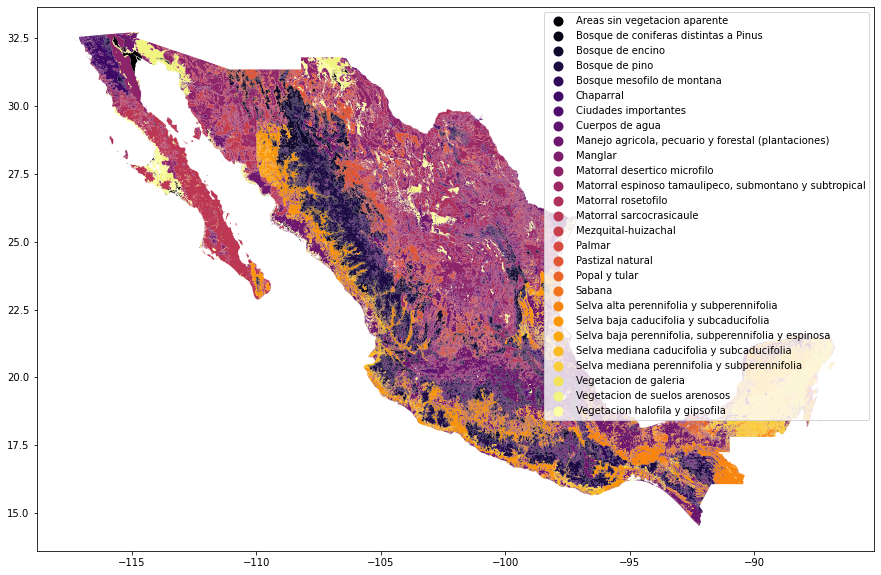

In [ ]:
uso_de_suelo.plot(
    column='GRUPO_FINA',
    figsize=(20,10),
    legend=True,
    cmap='inferno');

A continuación se describen las 6 columnas que conforman el dataframe, de acuerdo con la [documentación de CONABIO](http://www.conabio.gob.mx/informacion/metadata/gis/usv731mgw.xml?_xsl=/db/metadata/xsl/fgdc_html.xsl) :

`AREA` 👉	Area del polígono (grados decimales al cuadrado).

`PERIMETER` 👉 	Perímetro de los polígonos asociados a un uso de suelo o vegetación (grados decimales).

`COV_` 👉 	Identificador autonumérico del shapefile.

`COV_ID` 👉 	Identificador autonumérico del shapefile.

`GRUPO_FINA` 👉	Describe el tipo de uso de suelo o vegetación.

`geometry` 👉 Polígono georreferenciado.

Es importante notar que hay 27 categorías de uso del suelo y vegetación propuestas por la CONABIO para los polígonos seleccionados (mayores a 25 hectáreas).

In [ ]:
uso_de_suelo.dtypes

AREA           float64
PERIMETER      float64
COV_             int64
COV_ID           int64
GRUPO_FINA      object
geometry      geometry
dtype: object

Las columnas que pueden servir para nuestro proyecto son las de `GRUPO_FINA` (cadena) y, por supuesto, `geometry` (geometry). Los tipos de datos son adecuados, no obstante, podrían tener nombres más descriptivos. Cabe señalar que, a pesar de que sería útil tener los valores de extensión 2D para cada polígono, la columna de `AREA` no es útil para este proyecto ya que de acuerdo a la documentación, está en grados decimales y en este contexto no se pueden convertir directamente a metros cuadrados.

### Datos sobre ecorregiones

El otro dataset de CONABIO que utilizaremos es el de ecorregiones:

In [ ]:
ecorregiones.head(2)

,AREA,PERIMETER,COV_,COV_ID,ER_AC08_ID,ER060307_I,CVEECON1,DESECON1,CVEECON2,DESECON2,CVEECON3,DESECON3,CVEECON4,DESECON4,geometry
0,6.073213,32.566437,2,2,1.0,1.0,10,Desiertos de America del Norte,10.2,Desiertos Calidos,10.2.2,Desierto Sonorense,10.2.2.6,"Desiertos del Alto Golfo (Altar, El Pinacate, ...","POLYGON ((-116.02885 32.49821, -116.02917 32.4..."
1,2.141438,19.327718,3,1,2.0,2.0,11,California Mediterranea,11.1,California Mediterranea,11.1.1,"Bosques de Encino, Chaparral y Matorral Coster...",11.1.1.3,Lomerios y Planicies con matorral xerofilo y c...,"POLYGON ((-116.02885 32.49821, -116.02978 32.4..."


Tenemos un total de 888 renglones, es decir, 888 polígonos que representan las ecorregiones. 

In [ ]:
ecorregiones.shape

(888, 15)

Si visualizamos estos datos, podemos ver que proporcionan una buena cobertura del territorio nacional, por lo que consideramos que están completos.




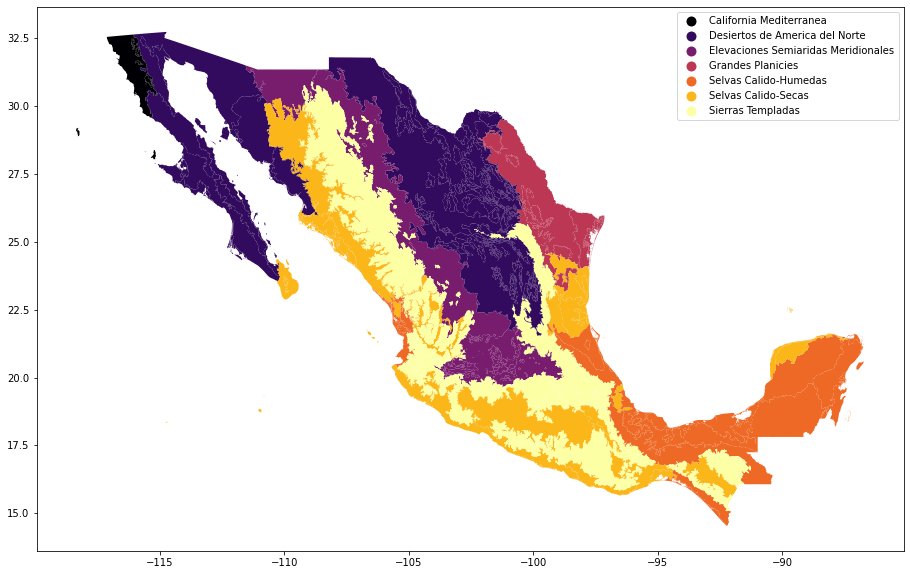

In [ ]:
ecorregiones.plot(column='DESECON1',
                  figsize=(20,10),
                  legend=True,
                  cmap='inferno');

A continuación se describen las 15 columnas que conforman el dataframe [de acuerdo con la documentación de CONABIO](http://www.conabio.gob.mx/informacion/metadata/gis/ecort08gw.xml?_xsl=/db/metadata/xsl/fgdc_html.xsl) :

`AREA` 👉	Area del polígono (grados decimales al cuadrado).

`PERIMETER` 👉 	Perímetro de los polígonos asociados a un uso de suelo o vegetación (grados decimales).

`COV_` 👉 	Identificador autonumérico del shapefile.

`COV_ID` 👉 	Identificador autonumérico del shapefile.

`ER_AC08_ID` 👉	Identificador autonumérico de la cobertura de ecorregiones terrestres usada para la edición de versión del 2008.

`ER060307_I` 👉	Identificador autonumérico de la cobertura de ecorregiones terrestres inicial y sin ediciones.

`CVEECON1` 👉	Clave de la ecorregión terrestre al nivel 1.

`DESECON1` 👉	Nombre de la ecorregión a nivel 1.

`CVEECON2` 👉	Clave de la ecorregión terrestre al nivel 2.

`DESECON2` 👉	Nombre de la ecorregión a nivel 2.

`CVEECON3` 👉	Clave de la ecorregión terrestre al nivel 3.

`DESECON3` 👉	Nombre de la ecorregión a nivel 3.

`CVEECON4` 👉	Clave de la ecorregión terrestre al nivel 4.

`DESECON4` 👉	Nombre de la ecorregión a nivel 4.

`geometry` 👉 Polígono georreferenciado.

Es importante notar el anidamiento de las ecorregiones en cuatro niveles jerárquicos, así como de su enumeración y denominación (el nivel 1 es el más general). Existen 7 ecorregiones a nivel 1, 22 a nivel 2, 39 a nivel 3 y 99 a nivel 4 para México [10].

In [ ]:
ecorregiones.dtypes

AREA           float64
PERIMETER      float64
COV_             int64
COV_ID           int64
ER_AC08_ID     float64
ER060307_I     float64
CVEECON1         int64
DESECON1        object
CVEECON2       float64
DESECON2        object
CVEECON3        object
DESECON3        object
CVEECON4        object
DESECON4        object
geometry      geometry
dtype: object

Las columnas que pueden servir para nuestro proyecto son las de `DESECON1` (cadena), `DESECON2` (cadena), `DESECON3` (cadena), `DESECON4` (cadena) y, por supuesto, `geometry` (geometry). Sus tipos de datos son adecuados, no obstante, podrían tener nombres más descriptivos. Cabe señalar que, a pesar de que sería útil tener los valores de extensión para cada polígono, la columna de `AREA` no es útil para este proyecto ya que de acuerdo a la documentación, está en grados decimales y en este contexto no se pueden convertir directamente a metros cuadrados.

## Limpieza de datos

### Depurar y renombrar columnas

FALTA aclarar por que no se renombra geometry
Con base en lo que vimos al realizar el análisis exploratorio de datos, vamos a depurar las columnas y renombrarlas para cada dataframe...

In [ ]:
fire_data = fire_data[['latitude', 'longitude', 'acq_date', 'acq_time', 'confidence', 'type']]
fire_data = fire_data.rename(
    columns={
        'latitude':'latitud', 
        'longitude':'longitud',  
        'acq_date':'fecha',
        'acq_time':'hora',
        'confidence':'confianza',
        'type':'tipo'
    })

In [ ]:
uso_de_suelo = uso_de_suelo[['GRUPO_FINA', 'geometry']]
uso_de_suelo = uso_de_suelo.rename(
    columns={ 
        'GRUPO_FINA':'tipo_suelo', 
        })

In [ ]:
ecorregiones = ecorregiones[['DESECON1','DESECON2','DESECON3','DESECON4', 'geometry']]
ecorregiones = ecorregiones.rename(
    columns={
        'DESECON1':'ecorregion_nivel_1',
        'DESECON2':'ecorregion_nivel_2',
        'DESECON3':'ecorregion_nivel_3',
        'DESECON4':'ecorregion_nivel_4',
        })

### Limpieza de NaN's

Revisamos la existencia de NaN's en los datasets...

In [ ]:
fire_data.isna().sum()

latitud      0
longitud     0
fecha        0
hora         0
confianza    0
tipo         0
dtype: int64

In [ ]:
ecorregiones.isna().sum()

ecorregion_nivel_1    0
ecorregion_nivel_2    0
ecorregion_nivel_3    0
ecorregion_nivel_4    0
geometry              0
dtype: int64

In [ ]:
uso_de_suelo.isna().sum()

tipo_suelo    16
geometry       0
dtype: int64

Sólo el dataframe de uso de suelo presentó NaN's, así que procedemos a eliminar esos renglones.

In [ ]:
uso_de_suelo = uso_de_suelo.dropna(axis=0, how='any')

## Transformación de datos

Como tenemos demasiados datos de puntos de calor, primero vamos a depurarlos de tal forma que sólo tengamos los tipos de puntos de calor asociados a incendios forestales y con una alta confianza, así no gastamos cómputo en datos de menor calidad. De esta manera filtraremos los datos con una confianza mayor a 90 % y de tipo 0.

In [ ]:
filtro_alta_confianza = fire_data['confianza'] > 90
filtro_incendios = fire_data['tipo'] == 0

fire_data = fire_data[filtro_alta_confianza & filtro_incendios]

Podemos ver que hemos reducido significativamente la cantidad de datos, incluso en un orden de magnitud.

Ahora vamos a calcular el área de cada polígono para los dataframes de `ecorregiones` y `uso_de_suelo`. Recordemos que el área en grados decimales  en el dataframe original no nos servía, sin embargo es posible calcularla al reproyectar las coordenadas de los polígonos en la columna de `geometry` a un sistema de referencia coordenado de igual área. [Para México puede funcionar el EPSG: 6372](https://gis.stackexchange.com/questions/234075/crs-for-calculating-areas-in-mexico) .


In [ ]:
ecorregiones['area_km2'] = pd.to_numeric(ecorregiones.to_crs(epsg='6372')['geometry'].area / 1000000)
uso_de_suelo['area_km2'] = pd.to_numeric(uso_de_suelo.to_crs(epsg='6372')['geometry'].area / 1000000)

Para verificar los resultados, si anteriormente asumimos que los polígonos de cada dataframe abarcaban todo el territorio nacional, podemos comparar la suma total de sus áreas con [la superficie de la república mexicana que es de 1,960,189 kilómetros cuadrados](http://cuentame.inegi.org.mx/territorio/extension/default.aspx?tema=T):

In [ ]:
print("exactitud de áreas de ecorregiones:      "+"{:.2f}".format(ecorregiones['area_km2'].sum()/1960189*100)+" %")
print("exactitud de áreas de tipos de suelo:    "+"{:.2f}".format(uso_de_suelo['area_km2'].sum()/1960189*100)+" %")

exactitud de áreas de ecorregiones:      99.17 %
exactitud de áreas de tipos de suelo:    99.04 %


En ambos casos tenemos una muy buena aproximación (para propósitos de este proyecto), mayor al 99%. 😎

Ahora necesitamos integrar los datos de las distintas fuentes para poder analizarlos posteriormente. Para ello necesitamos hacer un join de los dataframes. En este caso no hay una llave como tal para hacer el join, sino que utilizaremos las geometrías y un criterio espacial como "llave", de ahí la importancia de utilizar `geopandas`. Utilizaremos la intersección espacial de puntos en polígonos, es decir, para cada punto de calor (incendio), encontraremos el polígono dentro del cual se encuentra y le asignaremos el valor de tipo de suelo o ecorregión correspondiente. Y por esto es fundamental la georreferenciación (coordenadas) de estos datos. Para los siguientes pasos con `geopandas` nos ayudamos de [este libro](https://automating-gis-processes.github.io/)

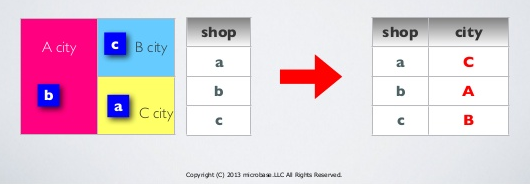

Los datasets de `ecorregiones` y `uso_de_suelo` ya están georeferenciados (de hecho, son geo-dataframes) pero `fire_data` aún no, ya que lo importamos de un CSV y lo hemos manejado como un dataframe normal aunque tiene columnas de coordenadas)...es momento de convertirlo a geo-dataframe ayudándonos de estas columnas. Para crear un geo-dataframe, geopandas nos pide:
* un dataframe
* el tipo de geometrías que queremos generar (puntos, líneas o polígonos) 
* las columnas que contienen las coordenadas de las geometrías de nuestros datos
* especificar un sistema de referencia de coordenadas (abreviado como CRS) 

En este caso vamos a generar puntos con las columnas `longitud` (coordenada x) y `latitud` (coordenada y) del dataframe `fire_data` (del cual conservaremos las columnas `confianza`,`fecha` y `hora`) cuyos valores están en el sistema WGS-84 (pero lo ponemos con su código EPSG:4326 porque así lo pide `geopandas`).

In [ ]:
fire_geometry = gpd.points_from_xy(fire_data['longitud'], fire_data['latitud'])

fire_points = (gpd
               .GeoDataFrame(
                   fire_data[['fecha','hora','confianza']], 
                   geometry=fire_geometry)
               .set_crs("epsg:4326"))

Nos cercioramos de que los tres geo-dataframes compartan el mismo sistema de referencia coordenado:

In [ ]:
print(fire_points.crs)
print(uso_de_suelo.crs)
print(ecorregiones.crs)

epsg:4326
epsg:4326
epsg:4326


Ahora vamos a realizar los joins. La función `sjoin` (spatial join) nos pide como argumentos los geo-dataframes izquierdo y derecho del join, el tipo de join `how` y la operación espacial `op` que se usará a manera de llaves. En este caso realizamos un left join donde `fire_points` es la tabla izquierda y `uso_de_suelo` es la tabla derecha, con una intersección de las geometrías de estas tablas.

Es importante mencionar que fue en este paso que nos dimos cuenta de la necesidad de incluir (e instalar) la biblioteca de `libspatialindex-dev`. De acuerdo con [la información que consultamos para resolver este problema](https://gis.stackexchange.com/questions/379648/error-while-using-sjoin-in-geopandas) (y como le ocurrió a una de nosotres), puede ser que también sea necesario reiniciar el kernel del notebook después de la instalación de `libspatialindex-dev` para que funcione.

De cualquier manera, es normal que este siguiente paso tome unos minutos para realizarse exitosamente.

In [ ]:
fire_points = gpd.sjoin(
    fire_points, 
    uso_de_suelo, 
    op='intersects')

Podemos ver que ahora los datos de puntos de incendios ya tienen el tipo de suelo donde ocurrieron. El proceso agregó una columna `index_right` que no nos sirve así que la eliminamos.

In [ ]:
fire_points = fire_points.drop('index_right', 1)

Ahora procedemos con el siguiente join para agregar los datos de `ecorregiones` a `fire_points` :

In [ ]:
fire_points = gpd.sjoin(
    fire_points, 
    ecorregiones, 
    op='intersects')

De nuevo borramos la columna `index_right` que se generó (y reseteamos los índices):

In [ ]:
fire_points = fire_points.drop('index_right', 1)

In [ ]:
fire_points = fire_points.reset_index()

In [ ]:
fire_points = fire_points.rename(columns={
    'area_km2_left': 'area_km2_tipo_suelo',
    'area_km2_right': 'area_km2_ecorregiones'
    })

Ya que realizamos un inner join, es probable que el geo-dataframe resultante tenga menos renglones en comparación con el que entró a la operación, podemos ver que efectivamente son menos renglones pero no perdimos una proporción significativa de los datos.

In [ ]:
fire_points.shape

Como vimos en el análisis exploratorio de datos, hay un par de columnas en `fire_data` referentes al tiempo que necesitamos cambiar su tipo de dato. Para el caso de la columna `hora`, escribimos una función que modifica las cadenas de caracteres y con esto les da un formato adecuado para poder convertirlas. Nos ayudamos de los métodos `slice` y `dt.time`  en la documentación de pandas [aquí](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.slice.html) y [aquí](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.time.html.)

In [ ]:
def to_time(serie):
  horas = serie.apply(str).str.slice(stop=-2)
  minutos = serie.apply(str).str.slice(start=-2)

  time_series = (pd
                 .concat([horas, minutos], axis=1)
                 .apply(lambda x: ':'.join(x), axis=1)
                 )

  return pd.to_datetime(time_series).dt.time

In [ ]:
fire_points['hora'] = to_time(fire_points['hora'])
fire_points['fecha'] = pd.to_datetime(fire_points['fecha'])

Para responder algunas de las preguntas clave sería útil hacer algunas agregaciones por año; asimismo, para enfatizar variaciones estacionales (intra-anuales) sería conveniente considerar el día del año (numerado de 1 a 365), por lo que calculamos y agregamos dichas columnas al dataframe:

In [ ]:
fire_points['dia_del_anio'] = fire_points['fecha'].dt.dayofyear
fire_points['anio'] = fire_points['fecha'].dt.year

Asimismo, para visualizar la cantidad de incendios con respecto al tiempo y al espacio, generamos los siguientes dataframes con agrupamientos y agregaciones. Aquí agrupamos y contamos los incendios a) por año y b) por día del año; asimismo añadimos una columna calculada que toma en cuenta la 'densidad' de incendios con respecto al área de su ecorregión (de manera análoga a como se calcula la densidad de población). 

In [ ]:
area_x_ecorregion1 = fire_points.groupby('ecorregion_nivel_1')['area_km2_ecorregiones'].sum().to_frame().reset_index()
area_x_ecorregion1.head(2)

In [ ]:
area_x_uso_de_suelo = fire_points.groupby('tipo_suelo')['area_km2_tipo_suelo'].sum().to_frame().reset_index()
area_x_uso_de_suelo.head(2)

In [ ]:
incendios_x_anio_x_ecorregion1 = fire_points.groupby('ecorregion_nivel_1')['anio'].value_counts().to_frame().rename(columns={'anio':'num_incendios'}).reset_index().sort_values('anio')
incendios_x_anio_x_ecorregion1 = pd.merge(incendios_x_anio_x_ecorregion1, area_x_ecorregion1, left_on='ecorregion_nivel_1', right_on='ecorregion_nivel_1')
incendios_x_anio_x_ecorregion1['incendios_cada_km2'] = incendios_x_anio_x_ecorregion1['num_incendios'] / incendios_x_anio_x_ecorregion1['area_km2_ecorregiones']
incendios_x_anio_x_ecorregion1

In [ ]:
incendios_x_dia_x_ecorregion1 = fire_points.groupby('ecorregion_nivel_1')['dia_del_anio'].value_counts().to_frame().rename(columns={'dia_del_anio':'num_incendios'}).reset_index().sort_values('dia_del_anio')
incendios_x_dia_x_ecorregion1 = pd.merge(incendios_x_dia_x_ecorregion1, area_x_ecorregion1, left_on='ecorregion_nivel_1', right_on='ecorregion_nivel_1')
incendios_x_dia_x_ecorregion1['incendios_cada_km2'] = incendios_x_dia_x_ecorregion1['num_incendios'] / incendios_x_dia_x_ecorregion1['area_km2_ecorregiones']
incendios_x_dia_x_ecorregion1

## Resultados

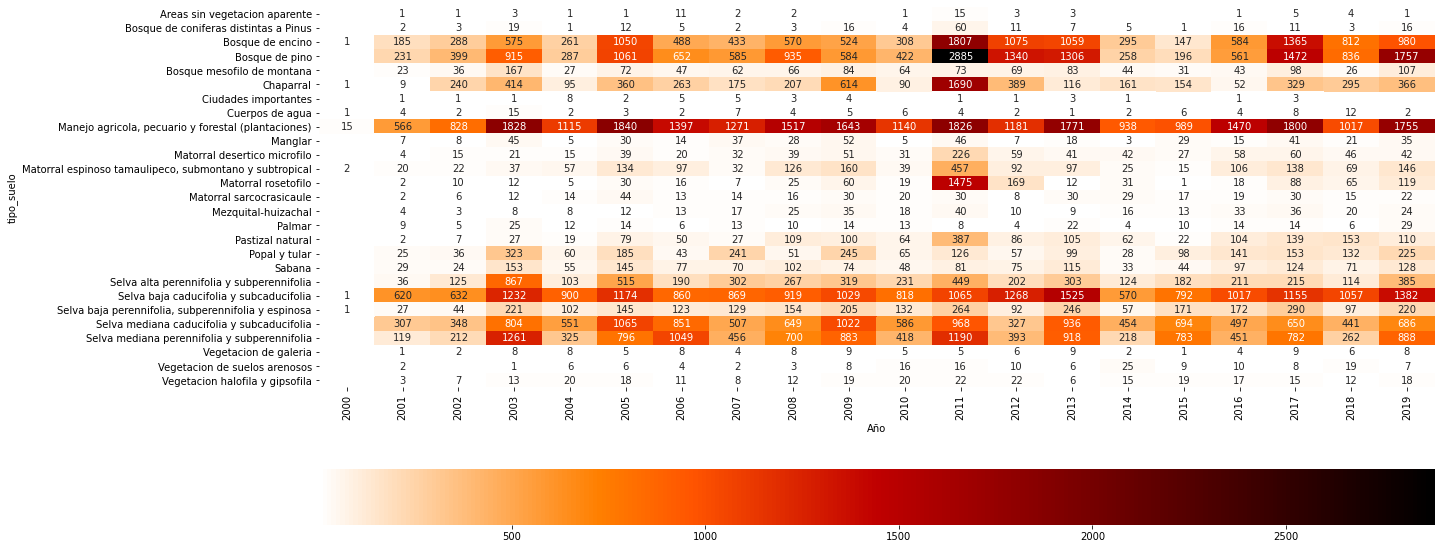

In [ ]:
#@title Mapa de calor de cantidad de incendios {display-mode: 'form', run: 'auto'}

#@markdown Para los tipos de suelo, se puede observar que aquellos suelos usados para plantaciones tiene la mayor presencia de incendios en todo el rango de tiempo; importante mencionar que las selvas también presentan una gran cantidad de eventualidades pero con la frecuencia que el tipo mencionado anteriormente.
#@markdown 
#@markdown Se puede observar un dato atipico en el 2011, lapso de tiempo fue reconocido por tener la mayor cantidad de eventualidades en los pasados 12 años.
#@markdown [Nota](https://expansion.mx/nacional/2011/04/12/mexico-enfrenta-la-peor-oleada-de-incendios-forestales-en-12-anos)

metrica = "tipo_suelo" #@param ["ecorregion_nivel_1", "tipo_suelo"]

piv = pd.pivot_table(
    fire_points, 
    values="index",
    index=[metrica], 
    columns=["anio"],
    aggfunc=lambda x: len(x.unique()))

plt.figure(figsize=(20,10))
ax = sns.heatmap(
    piv, 
    annot=True, 
    fmt=".0f" if metrica == 'tipo_suelo' else 'd', 
    cbar_kws={"orientation": "horizontal"},
    cmap='gist_heat_r')

ax.set_xlabel("Año")
ax.set_ylabel(metrica)

plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)
plt.show()

Con respecto a la frecuencia de incendios en ecorregiones a través del tiempo, graficamos las curvas de conteo anual:

In [ ]:
ax = incendios_x_anio_x_ecorregion1.pivot(index='anio', columns='ecorregion_nivel_1', values='num_incendios').plot(figsize=(12,5),ylabel='# total de incendios')
ax.legend(bbox_to_anchor = (1.05, 0.6))

En la gráfica anterior podemos ver que las ecorregiones donde regularmente ocurren más incendios cada año son las selvas cálido-húmedas, selvas cálido-secas y las sierras templadas. 

Por otro lado nos pareció adecuado comparar las ecorregiones con respecto a su 'densidad' de incendios, ya que a mayor superficie, es esperable que ocurran más incendios. El resultado fue el siguiente:

In [ ]:
ax = incendios_x_anio_x_ecorregion1.pivot(index='anio', columns='ecorregion_nivel_1', values='incendios_cada_km2').plot(figsize=(12,5),ylabel = '# incendios / km2')
ax.legend(bbox_to_anchor = (1.05, 0.6))

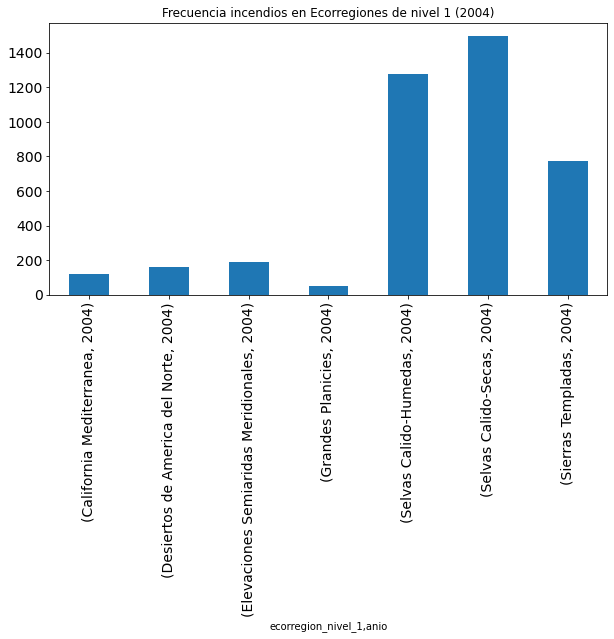

In [ ]:
#@title Histograma de Ecorregiones { display-mode: "form", run: "auto" }

year = 2004 #@param {type:"slider", min:2001, max:2019, step:1}

year_filter = fire_points['anio'] == year

(fire_points[year_filter]
 .groupby('ecorregion_nivel_1')['anio']
 .value_counts()
 .plot
 .bar(
      title=f"Frecuencia incendios en Ecorregiones de nivel 1 ({year})", 
      figsize=(10,5),
      fontsize=14));


Procedemos a descargar los datos que complementarán la biblioteca de `geopandas` para poder graficar el contorno del mapa de México y sus entidades federativas, de tal manera que estas sean compatibles con las coordenadas de nuestro data frame.

In [ ]:
!git clone https://github.com/jschleuss/mexican-states.git

Cloning into 'mexican-states'...
remote: Enumerating objects: 25, done.
remote: Total 25 (delta 0), reused 0 (delta 0), pack-reused 25
Unpacking objects: 100% (25/25), done.


In [ ]:
mex=gpd.read_file("mexican-states/mexican-states.shp")

Como se muestra en el mapa, pudimos percatarnos que los incendios no solo se concentraban en áreas específicas, sino que lo hacen en diferentes áreas dependiendo de la epoca del año, siendo de enero a junio la temporada donde más incendios se registran en el país.

También notamos que los incendios aumentaron drásticamente en el año 2019 comparado con el 2018.

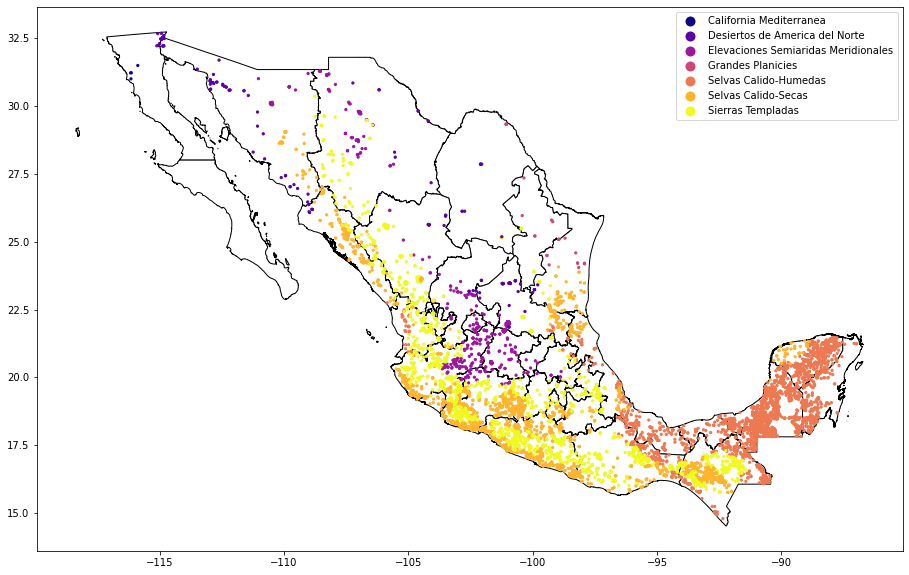

In [ ]:
#@title Mapa de Incendios entre fechas { display-mode: "form", run: "auto" }
from_date = "2019-01-01" #@param {type:"date",min:'2000-11-30', max:'2019-10-09'}
to_date = "2019-06-30" #@param {type:"date",min:'2000-11-30', max:'2019-10-09'}

from_date_filter = fire_points['fecha'] >= from_date
to_date_filter = fire_points['fecha'] <= to_date

temp_fire_points = fire_points.loc[from_date_filter & to_date_filter]

# Graficamos la base del mapa de México.
base = mex.plot(
    color='white', 
    edgecolor='black',
    figsize=(20,10))

# Graficamos los puntos de incendios por ecorregión.
temp_fire_points.plot(
    ax=base,
    column='ecorregion_nivel_1',
    figsize=(20,10),
    cmap='plasma',
    legend=True,
    marker='o', 
    markersize=5);

Ahora queremos, ver en un diagrama de 'pie chart' la proporción de incendios de la ecorregión de nivel 1.

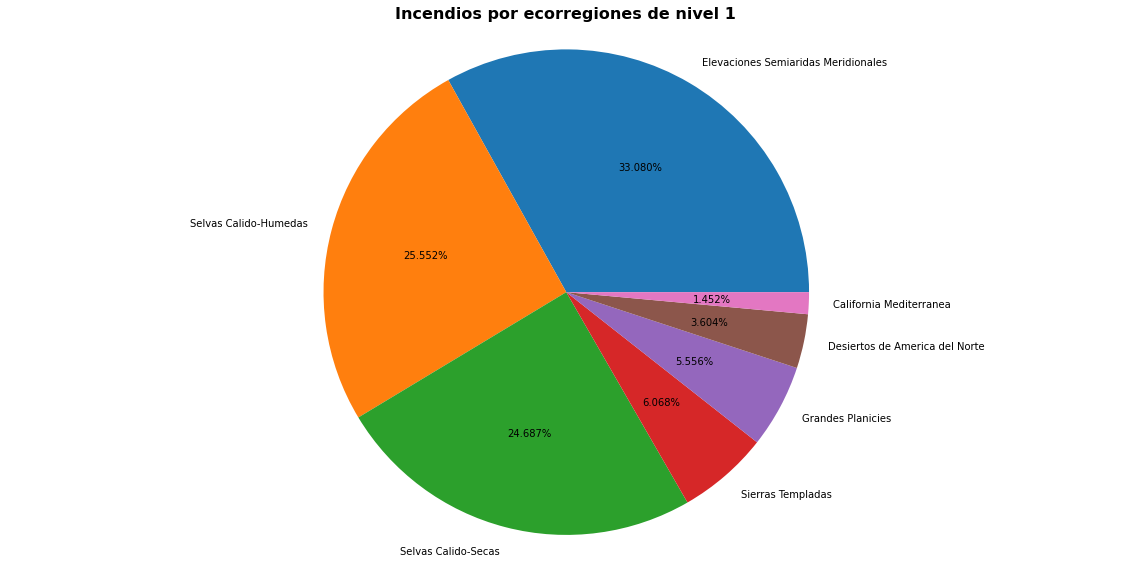

In [ ]:
lista_frecuencias = (
    fire_points['ecorregion_nivel_1']
    .value_counts()
    .to_list())

ecorregiones_nivel_1 = fire_points.ecorregion_nivel_1.unique()

fig, ax = plt.subplots()

ax.pie(
    lista_frecuencias, 
    labels=ecorregiones_nivel_1, 
    autopct='%1.3f%%',
    radius=1.3)
ax.axis('equal')
ax.set_title('Incendios por ecorregiones de nivel 1', weight='bold', size=16)

plt.show()

En general, puede verse que las ecorregiones de nivel 1 donde más incendios se registran son las Elevaciones Semiáridas Meridionales, las Selvas Cálido-Húmedas, y las Selvas Cálido-Secas, representando un 83.319% del total de los incendios.

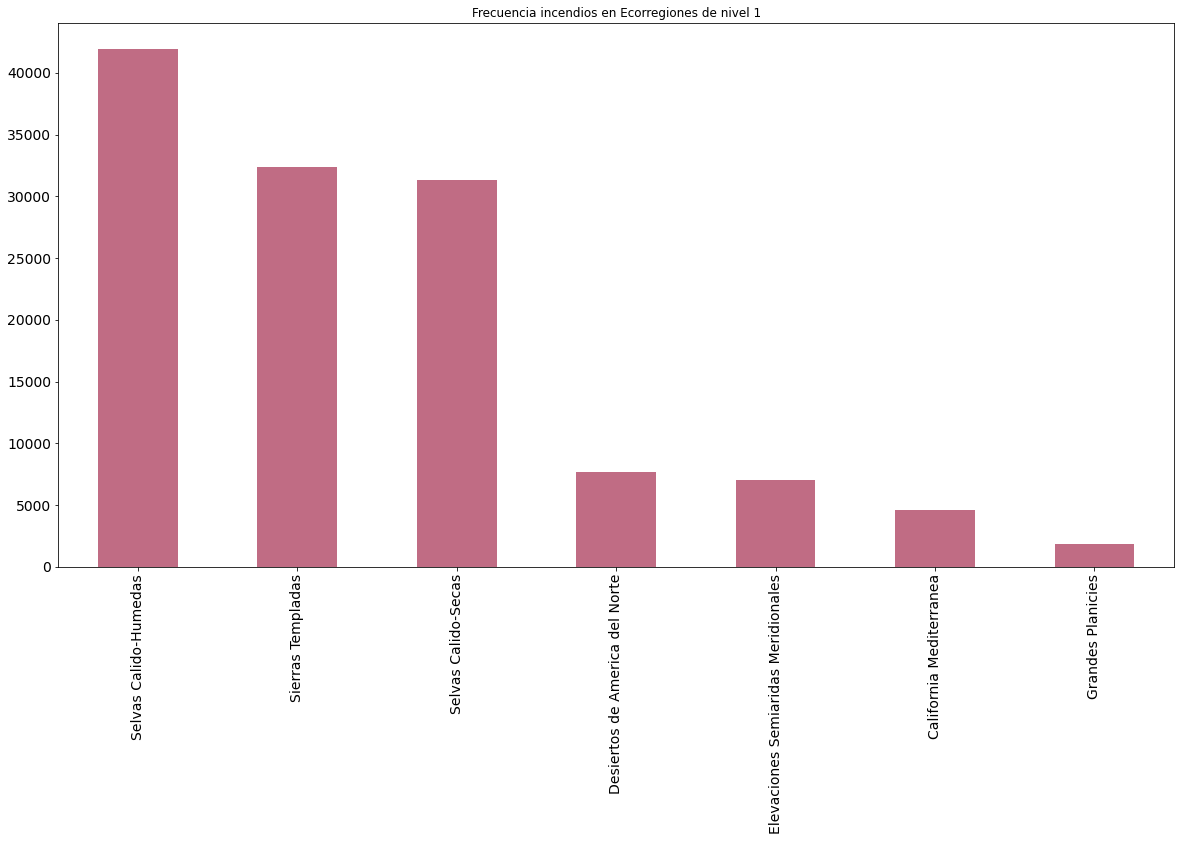

In [ ]:
#@title Frecuencia de Incendios en ecorregiones { display-mode: "form", run: "auto" }
nivel_ecorregion = "ecorregion_nivel_4" #@param ["ecorregion_nivel_1", "ecorregion_nivel_2", "ecorregion_nivel_3", "ecorregion_nivel_4"]

(fire_points[nivel_ecorregion]
 .value_counts()
 .plot
 .bar(
     color='#C06C84',
      title=f"Frecuencia incendios en Ecorregiones de nivel {nivel_ecorregion[-1]}",
      fontsize=14)
 );


En el diagrama de barras de frecuencias de las ecorregiones de nivel 1, puede verse que en las dos décadas que abarca nuestro set de datos, hubo más de 40000 incendios en las zonas de Selvas Cálido-Húmedas, más de 30000 incendios en las Sierras Templadas, y más de 30000 incendios en las Selvas Cálido-Secas, representando estas, las zonas con mayor incidencia de incendios.

Al analizar la frecuencia de los incendios en las ecorregiones de nivel 2 pudo apreciarse que la Planicie y Lomerios de la Península de Yucatán representa la zona con más riesgo de incendio.

La Planicie occidental Yucateca con Selva Caducifolia, es la ecorregión de nivel 3 con más incendios.


La Planicie Central Yucateca con selva mediana subcaducifolia, es la ecorregión de nivel 4 con más incendios.

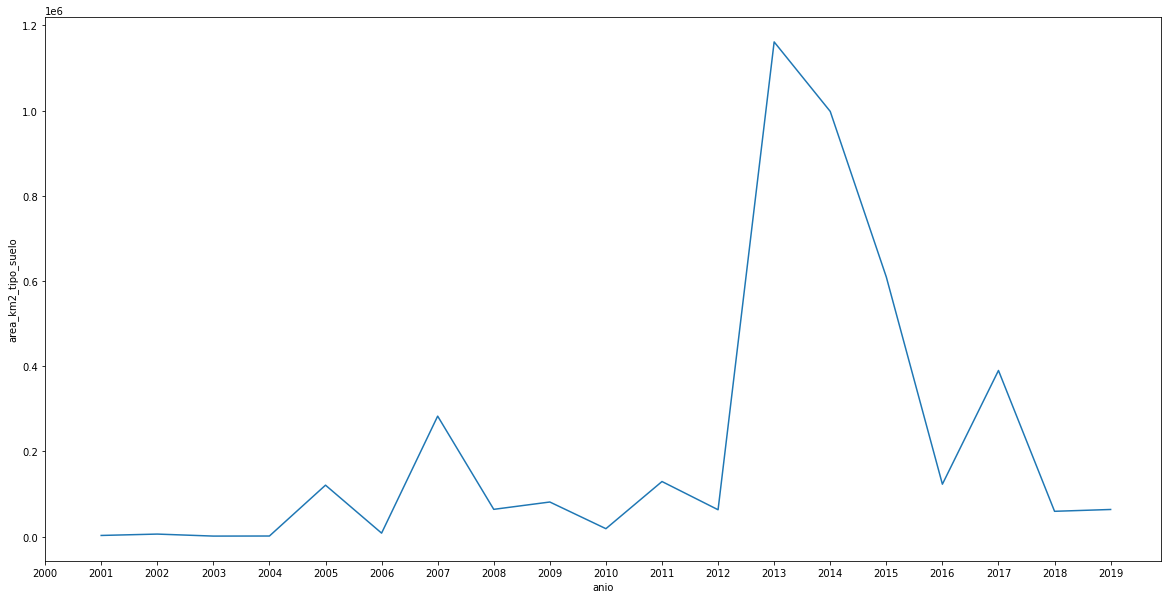

In [ ]:
#@title Grafica {display-mode: 'form', run: 'auto'}

tipo_suelo = 'Popal y tular' #@param ["Manejo agricola, pecuario y forestal (plantaciones)", "Matorral espinoso tamaulipeco, submontano y subtropical", "Bosque de encino", "Pastizal natural", "Matorral sarcocrasicaule", "Cuerpos de agua", "Popal y tular", "Selva baja caducifolia y subcaducifolia", "Bosque de pino", "Vegetacion halofila y gipsofila", "Mezquital-huizachal", "Bosque de coniferas distintas a Pinus", "Matorral rosetofilo", "Chaparral", "Selva alta perennifolia y subperennifolia", "Sabana", "Bosque mesofilo de montana", "Selva mediana perennifolia y subperennifolia", "Selva baja perennifolia, subperennifolia y espinosa", "Selva mediana caducifolia y subcaducifolia", "Palmar", "Ciudades importantes", "Vegetacion de galeria", "Manglar", "Areas sin vegetacion aparente", "Matorral desertico microfilo", "Vegetacion de suelos arenosos"]

query = fire_points.query(f"tipo_suelo == '{tipo_suelo}'").groupby('anio')['area_km2_tipo_suelo'].sum()

plt.figure(figsize=(20,10))
ax = sns.lineplot(data=query)
ax.set_xticks(range(2000, 2020))
plt.show()



# Conclusiones

● ¿Cuáles ecosistemas presentan más y menos incidencia de incendios forestales?

Como pudo apreciarse en nuestro estudio. Los ecosistemas que presentaron más incendios fueron las Elevaciones Semiáridas Meridionales, las Selvas Cálido-Húmedas, y las Selvas Cálido-Secas.

En la subcategoría de ecorregiones de nivel 2, la Planicie y Lomerios de la Península de Yucatán representa la zona con más riesgo de incendio.

En cuanto a las ecorregiones 3 y 4, pudimos percatarnos que las ecorregiones con mayor incidencia de incendios se encuentran en Yucatán.



● ¿Qué uso de suelos presenta más y menos incidencia de incendios forestales?

● ¿Existe alguna tendencia de aumento generalizado de los incendios forestales en México (que podría asociarse al calentamiento global)?

● De ser así, ¿esta tendencia se agudiza o atenúa con respecto al tipo de ecosistema?

● ¿Cuál es la variación estacional (inter-anual) de incendios forestales de acuerdo al tipo de ecosistema?

# Planes a futuro

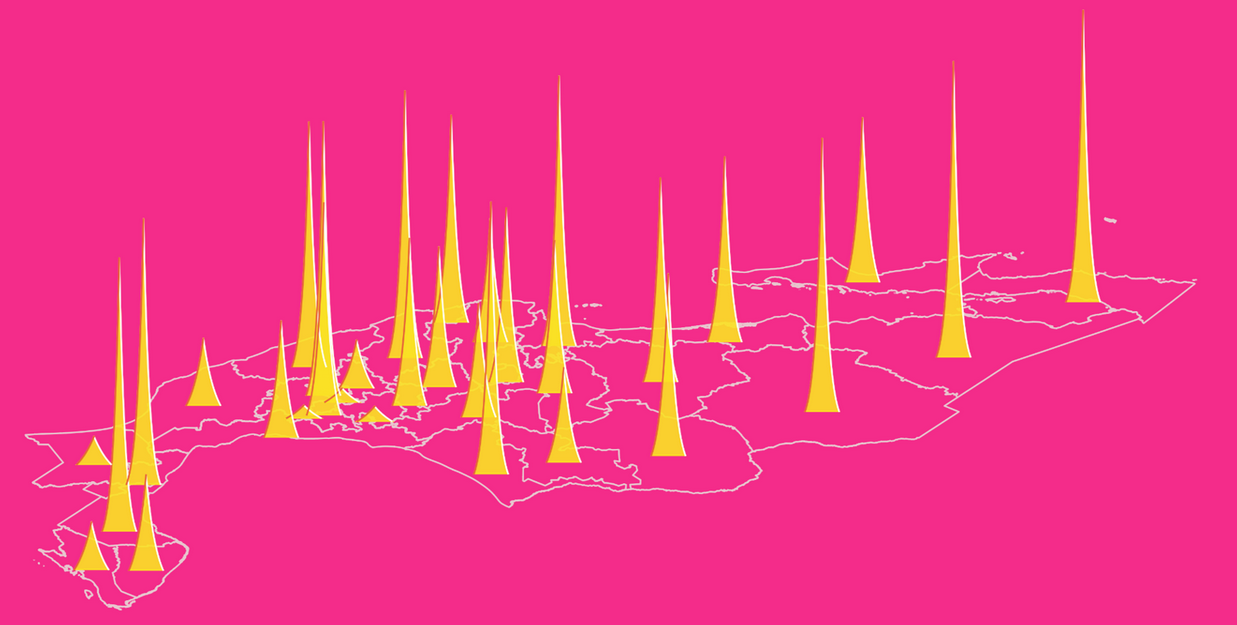

Tras obtener un amplio entendimiento de la problemática, ahora queremos correlacionar las 4 ecorregiones, el uso de suelos y la evolución en el tiempo, para obtener la probabilidad de incendios por coordenada y temporada del año.

Adicionalmente nos gustaría añadir más información sobre asentamientos humanos, carreteras y corroborar si la cercanía de estos factores sumado con el tipo de combustible (vegetación), aumenta la probabilidad de los incendios.

De esta manera poder saber qué zonas requieren especial atención y cuándo, para así poder prescribir acciones que ayuden a la prevención de incendios en México.